In [94]:
%pip install networkx

##Методы для работы с графами:
 - nx.Graph(): Создает пустой граф.
 - G.add_node(node): Добавляет одну вершину в граф.
 - G.add_nodes_from(nodes): Добавляет несколько вершин в граф.
 - G.add_edge(u, v): Добавляет ребро между вершинами u и v.
 - G.add_edges_from(edges): Добавляет несколько ребер в граф.
 - G.nodes(): Возвращает список всех вершин в графе.
 - G.edges(): Возвращает список всех ребер в графе.
 - G.degree(node): Возвращает степень вершины (количество ребер, соединенных с вершиной).
 - G.number_of_nodes(): Возвращает количество вершин в графе.
 - G.number_of_edges(): Возвращает количество ребер в графе.
 - G.neighbors(node): Возвращает список вершин, соединенных с данной вершиной.
 - G.adjacency(): Возвращает словарь, где ключи - вершины, а значения - списки вершин, соединенных с ключом.
 - G.subgraph(nodes): Возвращает подграф, содержащий только указанные вершины.
 - G.copy(): Возвращает копию графа.
##Методы для работы с вершинами:
 - G.nodes(data=True): Возвращает список вершин с данными.
 - G.nodes.data(): Возвращает итератор, который генерирует пары (узел, данные).
 - G.nodes.get(node): Возвращает данные вершины.
 - G.nodes.set(node, **attr): Устанавливает данные вершины.
 - G.nodes.remove(node): Удаляет вершину из графа.
##Методы для работы с ребрами:
 - G.edges(data=True): Возвращает список ребер с данными.
 - G.edges.data(): Возвращает итератор, который генерирует пары (ребро, данные).
 - G.edges.get(edge): Возвращает данные ребра.
 - G.edges.set(edge, **attr): Устанавливает данные ребра.
 - G.edges.remove(edge): Удаляет ребро из графа.

_____________________________________________________________________

##Список дел

число вершин - ✔

число ребер - ✔

диаметр графа - ✔

радиус графа - ✔

число компонент связности - ✔

цикломатическое число - ✔

среднее значение степеней вершин - ✔

максимальная степень вершины - ✔

минимальная степень вершины - ✔

медиана значений степеней вершин - ✔

мода степеней вершин - ✔

хроматическое число - ✔ (Требует проверки)

планарность - ✔

Для планарных графов:

число граней - ✔ (нужно протестировать)

среднее значение числа рёбер в грани - ✔

медианное значение - ✔

максимальное и минимальное значение - ✔

_____________________________________________________________________

Импорт библиотек

In [95]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

Функция для генерации графа

In [96]:
def generate_random_graph(num_nodes, edge_probability):
    """
    Генерирует случайный граф с заданным количеством узлов и вероятностью создания ребра.

    :param num_nodes: Количество узлов в графе.
    :param edge_probability: Вероятность создания ребра между двумя узлами.
    :return: Сгенерированный граф.
    """
    G = nx.Graph()
    # Добавляем узлы в граф
    G.add_nodes_from(range(num_nodes))

    # Создаем ребра с учетом вероятности
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if random.random() < edge_probability:
                G.add_edge(i, j)

    return G

Сохранение графа в виде графика

In [97]:
def save_graph(G, filename):
    """
    Сохраняет граф G в файл с заданным именем.

    :param G: Граф для сохранения.
    :param filename: Имя файла для сохранения графа.
    """
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True)
    plt.draw()
    plt.savefig(filename, dpi=300)
    plt.close()

Вычисление диаметра и радиуса

In [98]:
def calculate_diameter_and_radius(G):
    """
    Вычисляет диаметр и радиус графа.

    Диаметр графа определяется как максимальное расстояние между двумя вершинами графа.
    Радиус графа определяется как минимальное из максимальных расстояний от каждой вершины до всех остальных вершин.

    :param G: Граф, для которого вычисляются диаметр и радиус.
    :return: Кортеж, содержащий диаметр и радиус графа.
    """
    diameter = None
    radius = None
    if nx.is_connected(G):
      diameter = nx.diameter(G)
      radius = nx.radius(G)
    return diameter, radius

Число компонент связности

In [99]:
def number_connected_components(G):
  """
  Вычисляет число компонент связности графа G.

  :param G: Граф, для которого вычисляется число компонент связности.
  :return: Число компонент связности графа G.
  """
  return nx.number_connected_components(G)

Цикломатическое число

In [100]:
def circuit_rank(G):
    """
    Вычисляет контурный ранг (цикломатическое число) графа G, используя формулу:
    rank = E - N + C,
    где E - количество ребер, N - количество узлов, C - количество компонент связности.

    :param G: Граф, для которого вычисляется контурный ранг (цикломатическое число).
    :return: Ранг циклов графа G.
    """
    return nx.number_of_edges(G) - nx.number_of_nodes(G) + nx.number_connected_components(G)

Значение степеней вершин

In [101]:
from collections import Counter
def meaning_of_degrees(G):
    """
    Вычисляет максимальное, минимальное, среднее, медианное значение и моду степеней вершин в графе.

    Степень вершины определяется как количество ребер, соединенных с этой вершиной.

    :param G: Граф, для которого вычисляются значения.
    :return: Кортеж, содержащий максимальное, минимальное, среднее и медианное значение степеней вершин.
    """
    degrees = [val for (node, val) in G.degree()]
    max_value = max(degrees)
    min_value = min(degrees)
    mean_value = sum(degrees) / len(degrees)
    median_value = sorted(degrees)[len(degrees) // 2]
    degree_counts = Counter(degrees)
    mode_value = degree_counts.most_common(1)[0][0]

    return max_value, min_value, mean_value, median_value, mode_value

Хроматическое число

In [102]:
def is_safe(vertex, color, color_map, G):
    """
    Проверяет, можно ли безопасно окрасить вершину в указанный цвет.

    :param vertex: Индекс вершины.
    :param color: Цвет для окраски.
    :param color_map: Текущее отображение вершин на цвета.
    :param G: Граф.
    :return: True, если окраска безопасна, иначе False.
    """
    for neighbor in G.neighbors(vertex):
        if color_map[neighbor] == color:
            return False
    return True


def color_graph(vertex, num_colors, color_map, G):
    """
    Рекурсивно пытается окрасить граф, начиная с указанной вершины.

    :param vertex: Индекс вершины, с которой начинается окраска.
    :param num_colors: Количество доступных цветов.
    :param color_map: Текущее отображение вершин на цвета.
    :return: True, если граф успешно окрашен, иначе False.
    """
    if vertex == G.number_of_nodes():
        return True

    for color in range(num_colors):
        if is_safe(vertex, color, color_map, G):
            color_map[vertex] = color
            if color_graph(vertex + 1, num_colors, color_map, G):
                return True
            color_map[vertex] = -1

    return False


def calculate_chromatic_number(G):
    """
    Вычисляет хроматическое число графа с помощью алгоритма обратного отсчета.

    :return: Хроматическое число графа.
    """
    color_map = {node: -1 for node in G.nodes()}
    num_colors = 1

    while not color_graph(0, num_colors, color_map, G):
        num_colors += 1
        color_map = {node: -1 for node in G.nodes()}

    return num_colors

Проверка на планарность

In [103]:
def is_planar(G):
    """
    Проверяет, является ли граф планарным.

    :param G: Граф.
    :return: True, если граф планарный, иначе False.
    """
    return nx.algorithms.planarity.check_planarity(G)[0]

Число граней

In [104]:
def number_faces(G):
    """
    Вычисляет количество граней в планарном графе.

    :param G: Планарный граф.
    :return: Количество граней в планарном графе.
    """
    return len(nx.cycle_basis(G)) + 1

Среднее число рёбер в грани

In [105]:
def mean_number_face_edges(G):
    """
    Вычисляет среднее количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Среднее количество ребер в грани планарного графа.
    """
    return 2 * G.number_of_edges() / number_faces(G)


Медианное число рёбер в грани

In [106]:
def median_number_face_edges(G):
    """
    Вычисляет медианное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Медианное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return np.median(face_edges)

Максимальное число рёбер в грани

In [107]:
def max_number_face_edges(G):
    """
    Вычисляет максимальное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Максимальное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return max(face_edges)

Минимальное число рёбер в грани

In [108]:
def min_number_face_edges(G):
    """
    Вычисляет минимальное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Минимальное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return min(face_edges)

Немного тестов (я слишком тупой)

In [109]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,1), (4,2)])

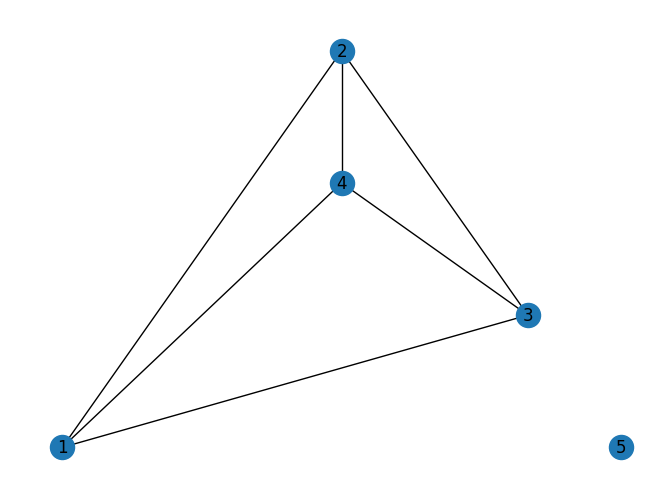

In [110]:
nx.draw_planar(G, with_labels=True)

In [111]:
P = nx.PlanarEmbedding(G)

In [112]:
save_graph(P, "test2.png")

In [113]:
list(nx.cycle_basis(G))

[[1, 2, 4], [3, 2, 4], [3, 1, 4]]

In [116]:
number_faces(G)

4

In [114]:
G.number_of_edges()

6

In [115]:
[mean_number_face_edges(G), median_number_face_edges(G), min_number_face_edges(G), max_number_face_edges(G)]

[3.0, 3.0, 3, 3]

Работа с графами

In [ ]:
fp = open("text.txt", "w")
labels = "Число_вершин Число_рёбер Диаметр Радиус число_компонент_связности цикломатическое_число Max Min Mean Median Мода Хроматическое_число Планарность Num_F Mean_F Median_F Max_F Min_F"
for i in range(1):
    num_nodes = random.randint(1, 100) # Количество узлов
    edge_probability = random.random() # Вероятность создания ребра
    G = generate_random_graph(num_nodes, edge_probability)
    filename = f"graph_{i}.png"
    save_graph(G, filename)
    #print(f"Создан и сохранен граф: {filename}")

    s = ""

    s+= f"{num_nodes} {G.number_of_edges()}"

    diameter, radius = calculate_diameter_and_radius(G)
    s += f" {diameter} {radius} "

    num_cc = number_connected_components(G)
    s += f"{num_cc} "

    cyc_num = circuit_rank(G)
    s += f"{cyc_num} "

    max_degree, min_degree, mean_degree, median_degree, mode_value = meaning_of_degrees(G)
    #print(f"Максимальная степень: {max_degree} \nМинимальная степень: {min_degree}\n"
    #      + f"Средняя степень: {mean_degree} \nМедианная степень: {median_degree}" +
    #     f"\nМода: {mode_value}")
    s += f"{max_degree} {min_degree} {mean_degree} {median_degree} {mode_value} "


    chromatic_number = calculate_chromatic_number(G)
    #print(f"Хроматическое число графа: {chromatic_number}")
    s += f"{chromatic_number} "

    plan = is_planar(G)
    s += f"{plan}"
    if plan:
      faces = number_faces(G)
      s += f" {faces} "

      mean_f = mean_number_face_edges(G)
      s += f"{mean_f} "

      median_f = median_number_face_edges(G)
      s += f"{median_f} "

      mx_f = max_number_face_edges(G)
      s += f"{mx_f} "

      mn_f = min_number_face_edges(G)
      s += f"{mn_f}"

    s += "\n"

    fp.write(s)

fp.close()

KeyboardInterrupt: 

Тесты

In [ ]:
G = nx.Graph()
G.add_nodes_from(range(5))
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 4)
filename = f"graph_{1}.png"
save_graph(G, filename)
print(f"Создан и сохранен граф: {filename}")
degrees = [(node, val) for (node, val) in G.degree()]
print(degrees)

In [ ]:
G = nx.path_graph(5)
nx.draw_planar(G)